In [309]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm


import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 

In [275]:
df = pd.read_excel('Выборка_Казань.xlsx', sheet_name = 0)
df = df[df['Мусор'] == 0]
df = df[df['outlier'] == 0]
df = df[df['dup'] == 0]
df.reset_index(drop = True , inplace = True )
df.head()

,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Широта,Сцепка_к,Unnamed: 63,ПОИСК,Текст,Ремонт,Общая площадь,Год постройки,Этаж/Этажность,Ссылка
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,55.852829,49.063304 55.852829,NaN,0.0,Продаю 1к квартиру-студию 27 квм в новом ЖК Но...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,55.689431,49.206271 55.689431,NaN,0.0,Срочная Продажа Новой Квартиры- Студиипродаетс...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,55.784501,49.193946 55.784501,NaN,0.0,Продается однокомнатная квартира по адресу Аль...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,55.869248,49.09223 55.869248,NaN,0.0,Продается просторная однокомнатная квартира на...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,55.795767,49.207753 55.795767,NaN,0.0,Продаётся просторная евро двухкомнатная в ЖК С...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...


## KMeans

In [437]:
df['med_price'] = df.groupby('Районы_2')['Цена(кв.м)'].transform('median').round()
df['mean_price'] = df.groupby('Районы_2')['Цена(кв.м)'].transform('mean').round()
df['med_s'] = df.groupby('Районы_2')['ОПлощадь'].transform('median')
df['med_year'] = df.groupby('Районы_2')['ГП_2'].transform('median')
df['med_distance'] = df.groupby('Районы_2')['Раст_центр_1'].transform('median').round()

In [439]:
df_2 = df[['Районы_2', 'mean_price', 'med_price', 'med_distance']].copy()
df_2 = df_2.sort_values('mean_price', ascending = False)
df_2 = df_2.drop_duplicates().reset_index().drop(columns = 'index')
df_2

,Районы_2,mean_price,med_price,med_distance
0,Центр,251945.0,247857.0,1433.0
1,Старотатарская_Суконная,227442.0,209217.0,2702.0
2,Квартал_56_Третий,220334.0,211490.0,3000.0
3,Зоопарк,205265.0,197607.0,4126.0
4,Ягодная_слобода,201852.0,197018.0,2728.0
5,Клыковка_Дальний,198580.0,200000.0,5347.0
6,Калуга_Аметьево,198511.0,202224.0,3334.0
7,Речной_Порт,194238.0,187908.0,2920.0
8,Вблизи_центра,181011.0,174196.0,5574.0
9,Царицыно,173986.0,170913.0,7311.0


In [453]:
features = ['med_price', 'med_distance']
n_clusters = 6

In [454]:
scaler = StandardScaler()  # Стандартизируем данные
scaled_features = scaler.fit_transform(df_2[features])
df_scaled = pd.DataFrame(data = scaled_features, columns = features) 
df_3 = pd.concat([df_2['Районы_2'], df_scaled], axis = 1)
df_3['med_price_r'] = df_2['med_price']
df_3['med_distance_r'] = df_2['med_distance']
df_3['mean_price'] = df_2['mean_price']
df_3

,Районы_2,med_price,med_distance,med_price_r,med_distance_r,mean_price
0,Центр,2.662848,-1.218554,247857.0,1433.0,251945.0
1,Старотатарская_Суконная,1.536243,-0.994994,209217.0,2702.0,227442.0
2,Квартал_56_Третий,1.602515,-0.942495,211490.0,3000.0,220334.0
3,Зоопарк,1.197736,-0.744128,197607.0,4126.0,205265.0
4,Ягодная_слобода,1.180563,-0.990413,197018.0,2728.0,201852.0
5,Клыковка_Дальний,1.267508,-0.529024,200000.0,5347.0,198580.0
6,Калуга_Аметьево,1.332352,-0.883654,202224.0,3334.0,198511.0
7,Речной_Порт,0.914948,-0.956589,187908.0,2920.0,194238.0
8,Вблизи_центра,0.515155,-0.489033,174196.0,5574.0,181011.0
9,Царицыно,0.419434,-0.183026,170913.0,7311.0,173986.0


In [455]:
kmeans = KMeans(n_clusters = 6, random_state = 42)
kmeans.fit(df_scaled)                                                                              #обучаем kmeans

KMeans(n_clusters=6, random_state=42)

In [456]:
df_3['Kmeans_2'] = kmeans.labels_
df_3

,Районы_2,med_price,med_distance,med_price_r,med_distance_r,mean_price,Kmeans_2
0,Центр,2.662848,-1.218554,247857.0,1433.0,251945.0,2
1,Старотатарская_Суконная,1.536243,-0.994994,209217.0,2702.0,227442.0,2
2,Квартал_56_Третий,1.602515,-0.942495,211490.0,3000.0,220334.0,2
3,Зоопарк,1.197736,-0.744128,197607.0,4126.0,205265.0,2
4,Ягодная_слобода,1.180563,-0.990413,197018.0,2728.0,201852.0,2
5,Клыковка_Дальний,1.267508,-0.529024,200000.0,5347.0,198580.0,2
6,Калуга_Аметьево,1.332352,-0.883654,202224.0,3334.0,198511.0,2
7,Речной_Порт,0.914948,-0.956589,187908.0,2920.0,194238.0,2
8,Вблизи_центра,0.515155,-0.489033,174196.0,5574.0,181011.0,4
9,Царицыно,0.419434,-0.183026,170913.0,7311.0,173986.0,0


In [457]:
mapping = {}                                                                                              #создаем словарь для меток
current_label = 6 

for i, row in df_3.iterrows():                                                                            #цикл,упорядочивающий метки по убыванию медианной цены                                                                 
    if row['Kmeans_2'] not in mapping:
        mapping[row['Kmeans_2']] = current_label
        current_label -= 1

df_3['Kmeans_2'] = df_3['Kmeans_2'].map(mapping)
df_3 = df_3.sort_values('Kmeans_2', ascending = False) 
df_3.reset_index(drop = True , inplace = True )
df_3

,Районы_2,med_price,med_distance,med_price_r,med_distance_r,mean_price,Kmeans_2
0,Центр,2.662848,-1.218554,247857.0,1433.0,251945.0,6
1,Квартал_56_Третий,1.602515,-0.942495,211490.0,3000.0,220334.0,6
2,Зоопарк,1.197736,-0.744128,197607.0,4126.0,205265.0,6
3,Ягодная_слобода,1.180563,-0.990413,197018.0,2728.0,201852.0,6
4,Клыковка_Дальний,1.267508,-0.529024,200000.0,5347.0,198580.0,6
5,Калуга_Аметьево,1.332352,-0.883654,202224.0,3334.0,198511.0,6
6,Речной_Порт,0.914948,-0.956589,187908.0,2920.0,194238.0,6
7,Старотатарская_Суконная,1.536243,-0.994994,209217.0,2702.0,227442.0,6
8,Левый_Берег,-0.044124,-0.295246,155014.0,6674.0,158024.0,5
9,Пороховая_слобода,-0.368490,-0.650229,143889.0,4659.0,146061.0,5


### Визуализация
#### По двум параметрам 
##### Медианная цена / медианный год постройки

In [387]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = df_3,
               x = 'med_price',
               y = 'med_year',
               hue = 'Kmeans_2',
               palette = ['seagreen', 'darkorchid', 'dodgerblue', 'tomato', 'navy', 'gold', 'brown', 'hotpink'],
               s = 70
              )
plt.title('KMeans: медианная цена и медианный год постройки')

ValueError: Could not interpret value `med_year` for parameter `y`

<Figure size 1000x700 with 0 Axes>

##### Медианная цена / медианное расстояние от центра 

/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning:

The palette list has more values (8) than needed (6), which may not be intended.



Text(0.5, 1.0, 'KMeans: медианная цена и медианное расстояние от центра')

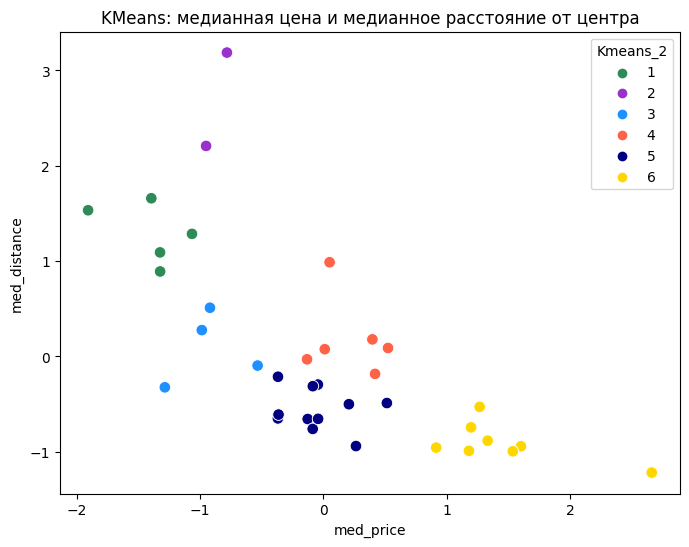

In [458]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_3,
               x = 'med_price',
               y = 'med_distance',
               hue = 'Kmeans_2',
               palette = ['seagreen', 'darkorchid', 'dodgerblue', 'tomato', 'navy', 'gold', 'brown', 'hotpink'],
               s = 70
              )
plt.title('KMeans: медианная цена и медианное расстояние от центра')

/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning:

The palette list has more values (8) than needed (6), which may not be intended.



Text(0.5, 1.0, 'KMeans: медианная цена и медианное расстояние от центра')

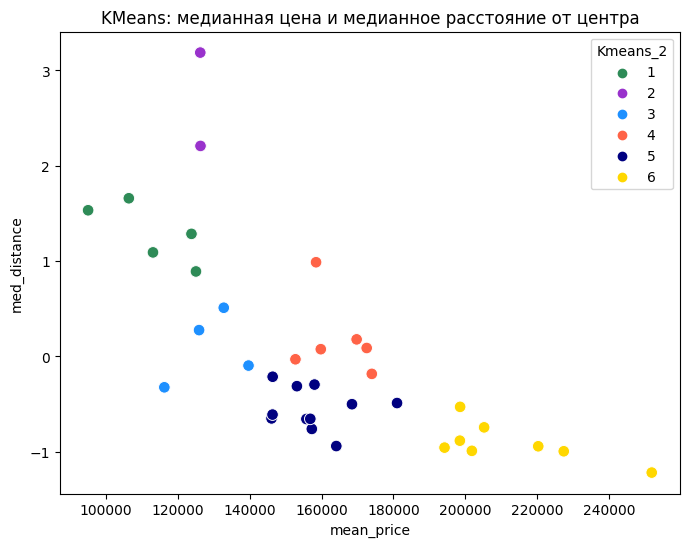

In [459]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_3,
               x = 'mean_price',
               y = 'med_distance',
               hue = 'Kmeans_2',
               palette = ['seagreen', 'darkorchid', 'dodgerblue', 'tomato', 'navy', 'gold', 'brown', 'hotpink'],
               s = 70
              )
plt.title('KMeans: медианная цена и медианное расстояние от центра')

##### Медианная цена / медианная площадь

Text(0.5, 1.0, 'KMeans: медианная цена и медианное расстояние от центра')

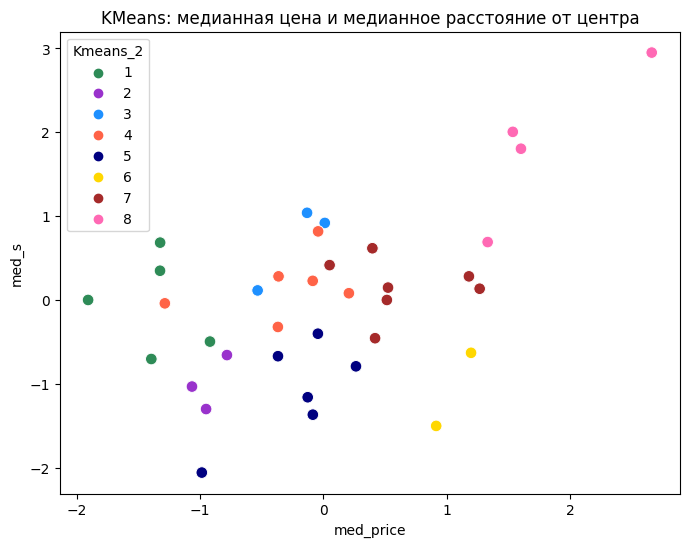

In [308]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_3,
               x = 'med_price',
               y = 'med_s',
               hue = 'Kmeans_2',
               palette = ['seagreen', 'darkorchid', 'dodgerblue', 'tomato', 'navy', 'gold', 'brown', 'hotpink'],
               s = 70
              )
plt.title('KMeans: медианная цена и медианное расстояние от центра')

## 3D

In [342]:
from mpl_toolkits.mplot3d import Axes3D

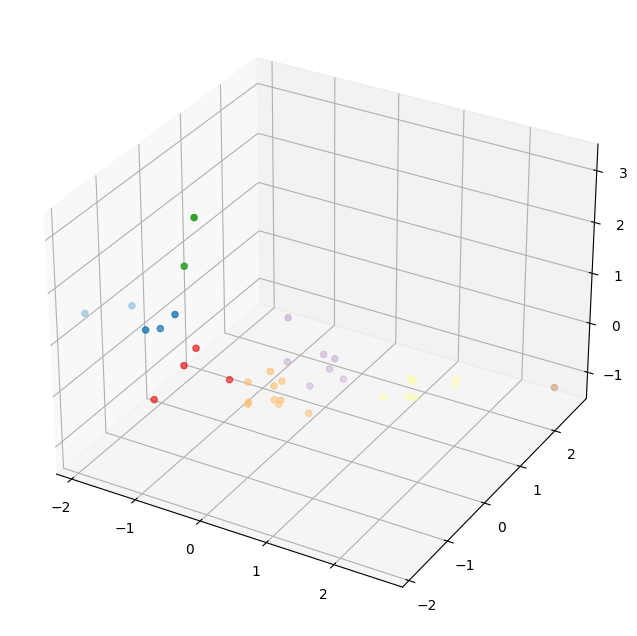

In [347]:
ax = plt.figure(figsize = (12, 8)).add_subplot(111, projection='3d')

ax.scatter(
            xs = df_3['med_price'], 
            ys = df_3['mean_price'], 
            zs = df_3['med_distance'], 
            c = df_3['Kmeans_2'], 
            cmap = plt.cm.get_cmap('Paired', 8)
        )

## PCA

In [348]:
pca = PCA(n_components = 2)                      
components_2 = pca.fit_transform(df_scaled)

In [349]:
pca_df = pd.DataFrame(data = components_2, columns = ['Component_1', 'Component_2'])
pca_df['Kmeans_2'] = df_3['Kmeans_2']

In [350]:
#centers = pd.DataFrame(kmeans.cluster_centers

Text(0.5, 1.0, 'Кластеры районов с PCA')

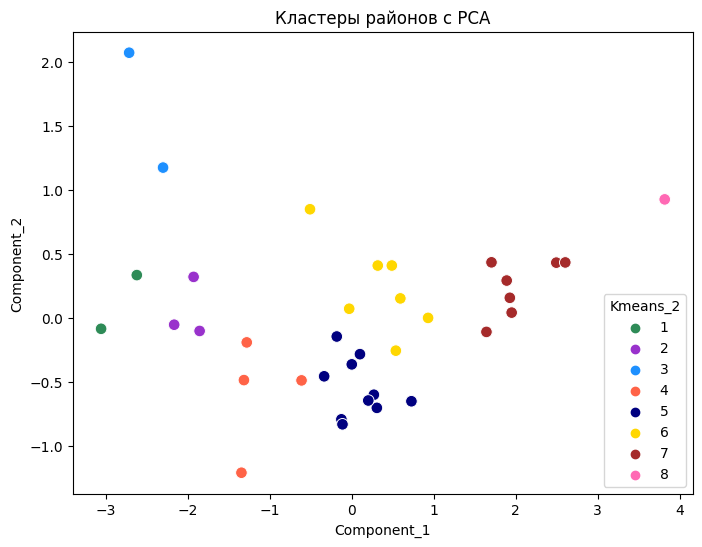

In [351]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data = pca_df,
               x = 'Component_1',
               y = 'Component_2',
               hue = 'Kmeans_2',
               palette = ['seagreen', 'darkorchid', 'dodgerblue', 'tomato', 'navy', 'gold', 'brown', 'hotpink'],
               s = 70
              )
plt.title('Кластеры районов с PCA')

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data = pca_df,
               x = 'Component_1',
               y = 'Component_2',
               hue = 'Kmeans_2',
               style = 'Kmeans_2',
               ax = ax,
               palette = ['seagreen', 'darkorchid', 'dodgerblue', 'tomato', 'navy', 'gold', 'brown', 'hotpink'],
               s = 70
              )
plt.title('Кластеры районов с PCA')

## TSNE

In [352]:
tsne = TSNE(n_components = 2, random_state = 42, perplexity = 15).fit_transform(df_scaled)

df_tsne = pd.DataFrame(tsne, columns = ['TSNE_1', 'TSNE_2'])
df_tsne['Районы_2'] = df_3['Районы_2']
df_tsne['Kmeans_2'] = df_3['Kmeans_2']
df_tsne

,TSNE_1,TSNE_2,Районы_2,Kmeans_2
0,75.674217,-169.318771,Центр,8
1,93.143326,-144.424179,Квартал_56_Третий,7
2,65.699883,-141.127884,Старотатарская_Суконная,7
3,108.219879,-122.236221,Калуга_Аметьево,7
4,78.319565,-91.944817,Клыковка_Дальний,7
5,81.843567,-117.968681,Зоопарк,7
6,102.941315,-97.971687,Ягодная_слобода,7
7,56.296627,-108.774986,Речной_Порт,7
8,41.335056,-34.965019,Городские_поселки,6
9,37.064152,-76.314796,Вблизи_центра,6


Text(0.5, 1.0, 'Кластеры районов с TSNE')

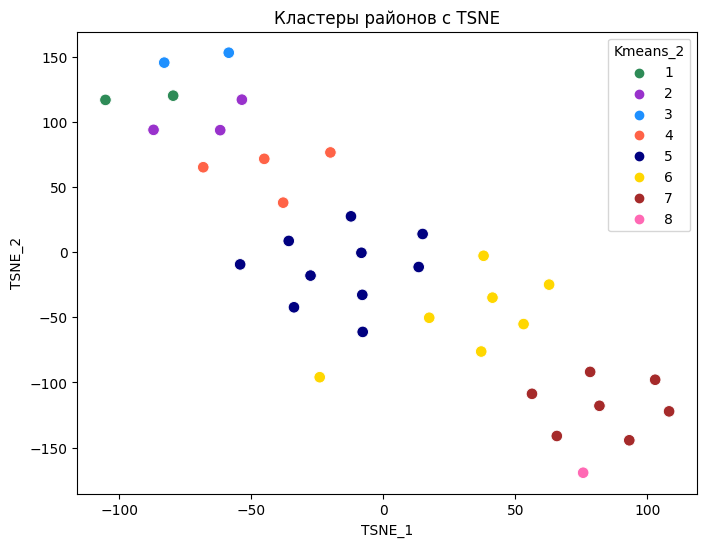

In [353]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_tsne,
               x = 'TSNE_1',
               y = 'TSNE_2',
               hue = 'Kmeans_2',
               palette = ['seagreen', 'darkorchid', 'dodgerblue', 'tomato', 'navy', 'gold', 'brown', 'hotpink'],
               s = 70
              )
plt.title('Кластеры районов с TSNE')

# Иерархическая агломеративная кластеризация

In [295]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [389]:
df_aggl = df_2.copy()

In [461]:
X = df_aggl[['med_price', 'med_distance']]
n_clusters = 7

In [462]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [463]:
#pca = PCA(n_components = 2)
#X_principal = pca.fit_transform(X_scaled)

Text(0.5, 1.0, 'Дендрограмма')

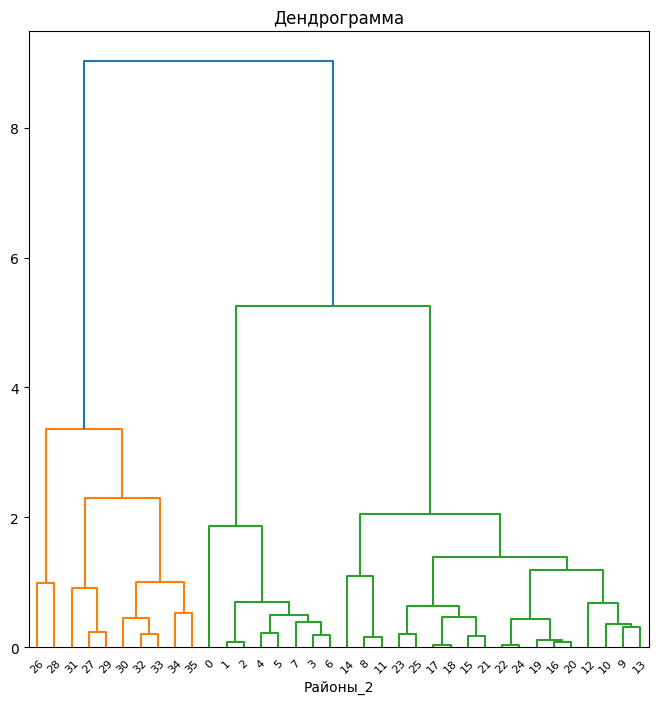

In [464]:
plt.figure(figsize = (8, 8))
dendrogram_1 = shc.dendrogram((shc.linkage(X_scaled, method = 'ward')))

plt.xlabel('Районы_2')
plt.title('Дендрограмма')

In [465]:
clustering = AgglomerativeClustering(n_clusters = 7,
                                     affinity = 'euclidean',
                                     linkage = 'ward'
                                    )
clustering.fit(X_scaled)

AgglomerativeClustering(n_clusters=7)

In [466]:
df_aggl['Aggl_cluster'] = clustering.labels_
df_aggl = df_aggl.sort_values('med_price', ascending = False)
df_aggl

,Районы_2,med_price,med_distance,Aggl_cluster
0,Центр,247857.0,1433.0,6
1,Квартал_56_Третий,211490.0,3000.0,5
2,Старотатарская_Суконная,209217.0,2702.0,5
3,Калуга_Аметьево,202224.0,3334.0,5
4,Клыковка_Дальний,200000.0,5347.0,5
5,Зоопарк,197607.0,4126.0,5
6,Ягодная_слобода,197018.0,2728.0,5
7,Речной_Порт,187908.0,2920.0,5
8,Городские_поселки,174516.0,8852.0,2
9,Вблизи_центра,174196.0,5574.0,0


In [467]:
mapping = {}                                                                                              #создаем словарь для меток
current_label = 7 

for i, row in df_aggl.iterrows():                                                                            #цикл,упорядочивающий метки по убыванию медианной цены                                                                 
    if row['Aggl_cluster'] not in mapping:
        mapping[row['Aggl_cluster']] = current_label
        current_label -= 1

df_aggl['Aggl_cluster'] = df_aggl['Aggl_cluster'].map(mapping)
df_aggl.sort_values('Aggl_cluster', ascending = False) 

,Районы_2,med_price,med_distance,Aggl_cluster
0,Центр,247857.0,1433.0,7
2,Старотатарская_Суконная,209217.0,2702.0,6
3,Калуга_Аметьево,202224.0,3334.0,6
4,Клыковка_Дальний,200000.0,5347.0,6
5,Зоопарк,197607.0,4126.0,6
6,Ягодная_слобода,197018.0,2728.0,6
7,Речной_Порт,187908.0,2920.0,6
1,Квартал_56_Третий,211490.0,3000.0,6
14,Усады,158268.0,13959.0,5
8,Городские_поселки,174516.0,8852.0,5


/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning:

The palette list has more values (8) than needed (7), which may not be intended.

/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning:

The palette list has more values (8) than needed (6), which may not be intended.



<AxesSubplot:xlabel='med_price', ylabel='med_distance'>

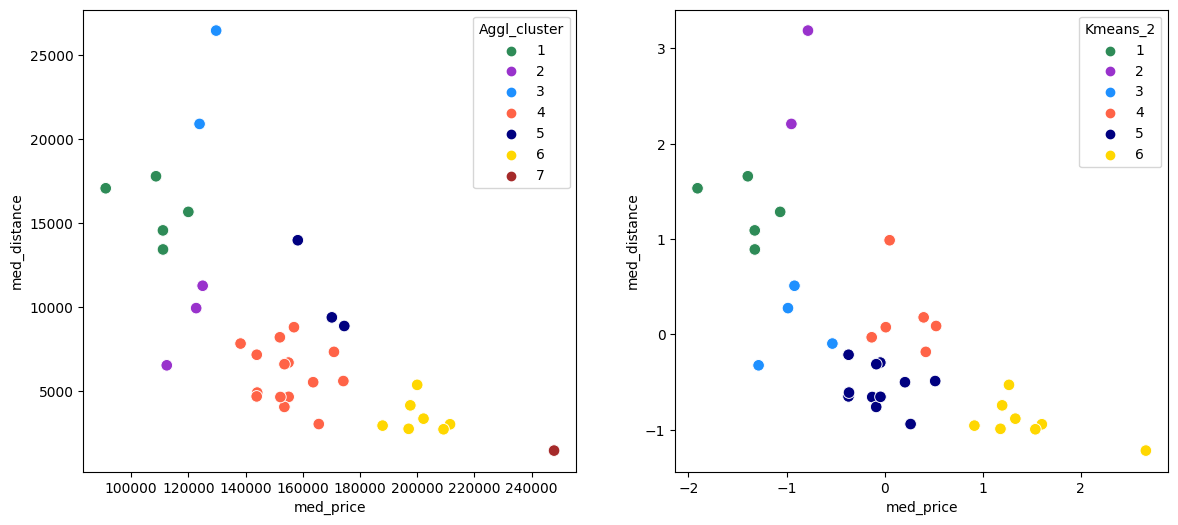

In [468]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

sns.scatterplot(data = df_aggl,
               x = 'med_price',
               y = 'med_distance',
               hue = 'Aggl_cluster',
               palette = ['seagreen', 'darkorchid', 'dodgerblue', 'tomato', 'navy', 'gold', 'brown', 'hotpink'],
               s = 70,
               ax = ax[0]  
              )

sns.scatterplot(data = df_3,
               x = 'med_price',
               y = 'med_distance',
               hue = 'Kmeans_2',
               palette = ['seagreen', 'darkorchid', 'dodgerblue', 'tomato', 'navy', 'gold', 'brown', 'hotpink'],
               s = 70,
               ax = ax[1]  
              )
